In [1]:
# import all libraries and modules
import tensorflow as tf 
import pandas as pd  
import numpy as np    
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import ConvLSTM2D, Dropout
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import QuantileTransformer, StandardScaler, MinMaxScaler
tf.random.set_seed(123)
np.random.seed(123)
import datetime
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn import set_config
import hydroeval as he

In [2]:
# tensorflow version
tf.__version__

'2.4.1'

In [3]:
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (16, 9)

In [4]:
fn = '/home/jefire/project/water/input/jide_q_h_data/jiderebode_h_imerge_data_2000_2021.csv'

In [5]:
df = pd.read_csv(fn)
df

,date,Pt-59,Rt-207,Tt,Tt-129,Tavgt-6,Tavgt-220,H
0,2000-12-24,0.024893,806.227441,22.162928,28.957788,22.065407,28.769083,331.75
1,2000-12-25,0.024559,804.305827,22.137035,28.277483,22.060858,28.714231,332.74
2,2000-12-26,0.082533,804.002595,22.514109,27.742418,22.142795,28.662624,333.00
3,2000-12-27,0.180188,797.916736,22.487470,28.105324,22.226715,28.612342,333.49
4,2000-12-28,0.085362,785.459225,22.716461,29.599943,22.318781,28.564346,334.00
...,...,...,...,...,...,...,...,...
7581,2021-09-26,9.375081,852.617897,31.067743,34.296530,30.655116,31.219590,438.00
7582,2021-09-27,8.460711,853.379331,30.464815,34.135807,30.533431,31.252320,435.00
7583,2021-09-28,12.678004,853.541427,30.405666,34.440166,30.548318,31.282351,430.00
7584,2021-09-29,6.628835,857.843422,30.473732,34.654995,30.650742,31.310892,425.00


In [6]:
# make a copy of the Dataframe
df_copy = df.copy()
df_copy

,date,Pt-59,Rt-207,Tt,Tt-129,Tavgt-6,Tavgt-220,H
0,2000-12-24,0.024893,806.227441,22.162928,28.957788,22.065407,28.769083,331.75
1,2000-12-25,0.024559,804.305827,22.137035,28.277483,22.060858,28.714231,332.74
2,2000-12-26,0.082533,804.002595,22.514109,27.742418,22.142795,28.662624,333.00
3,2000-12-27,0.180188,797.916736,22.487470,28.105324,22.226715,28.612342,333.49
4,2000-12-28,0.085362,785.459225,22.716461,29.599943,22.318781,28.564346,334.00
...,...,...,...,...,...,...,...,...
7581,2021-09-26,9.375081,852.617897,31.067743,34.296530,30.655116,31.219590,438.00
7582,2021-09-27,8.460711,853.379331,30.464815,34.135807,30.533431,31.252320,435.00
7583,2021-09-28,12.678004,853.541427,30.405666,34.440166,30.548318,31.282351,430.00
7584,2021-09-29,6.628835,857.843422,30.473732,34.654995,30.650742,31.310892,425.00


In [7]:
# convert to datetime object
df_copy.date = pd.to_datetime(df_copy.date, dayfirst = False)
df_copy

,date,Pt-59,Rt-207,Tt,Tt-129,Tavgt-6,Tavgt-220,H
0,2000-12-24,0.024893,806.227441,22.162928,28.957788,22.065407,28.769083,331.75
1,2000-12-25,0.024559,804.305827,22.137035,28.277483,22.060858,28.714231,332.74
2,2000-12-26,0.082533,804.002595,22.514109,27.742418,22.142795,28.662624,333.00
3,2000-12-27,0.180188,797.916736,22.487470,28.105324,22.226715,28.612342,333.49
4,2000-12-28,0.085362,785.459225,22.716461,29.599943,22.318781,28.564346,334.00
...,...,...,...,...,...,...,...,...
7581,2021-09-26,9.375081,852.617897,31.067743,34.296530,30.655116,31.219590,438.00
7582,2021-09-27,8.460711,853.379331,30.464815,34.135807,30.533431,31.252320,435.00
7583,2021-09-28,12.678004,853.541427,30.405666,34.440166,30.548318,31.282351,430.00
7584,2021-09-29,6.628835,857.843422,30.473732,34.654995,30.650742,31.310892,425.00


In [8]:
# get summary statistics
df_copy.describe()

,Pt-59,Rt-207,Tt,Tt-129,Tavgt-6,Tavgt-220,H
count,7586.000000,7586.000000,7586.000000,7586.000000,7586.000000,7586.000000,7586.000000
mean,2.658584,552.530408,28.678575,28.609405,28.675860,28.618282,255.202328
std,4.021363,330.794236,3.943793,3.947781,3.874746,1.685025,143.615109
min,0.000000,40.271744,16.909994,16.909994,17.863685,25.611789,0.000000
25%,0.024447,211.769856,26.043762,25.939181,26.064920,27.122418,113.000000
50%,0.628331,590.062714,29.649118,29.571434,29.755682,28.390745,304.425000
75%,3.853519,859.759258,31.502815,31.449186,31.393429,30.238243,350.143462
max,26.368990,1120.758299,35.947914,35.947914,35.410259,31.572935,682.000000


In [9]:
# get datetime statistics
df_copy.date.describe()

<ipython-input-9-230b203a077f>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_copy.date.describe()


count                    7586
unique                   7586
top       2000-12-24 00:00:00
freq                        1
first     2000-12-24 00:00:00
last      2021-09-30 00:00:00
Name: date, dtype: object

In [10]:
# Define a function to prepare multivariate data
# so that it is suitable for a time series.
def custom_ts_multi_data_prep(dataset, target, start, end, window, horizon):
    X = []
    y = []
    start = start + window
    if end is None:
        end = len(dataset) - horizon
    for i in range(start, end):
        indicex = range(i-window, i)
        X.append(dataset[indicex])
        indicey = range(i-1, i-1+horizon)
        y.append(target[indicey])
    return np.array(X), np.array(y)

In [11]:
# set date as index
df_copy.set_index("date", inplace=True)
df_copy

,Pt-59,Rt-207,Tt,Tt-129,Tavgt-6,Tavgt-220,H
date,,,,,,,
2000-12-24,0.024893,806.227441,22.162928,28.957788,22.065407,28.769083,331.75
2000-12-25,0.024559,804.305827,22.137035,28.277483,22.060858,28.714231,332.74
2000-12-26,0.082533,804.002595,22.514109,27.742418,22.142795,28.662624,333.00
2000-12-27,0.180188,797.916736,22.487470,28.105324,22.226715,28.612342,333.49
2000-12-28,0.085362,785.459225,22.716461,29.599943,22.318781,28.564346,334.00
...,...,...,...,...,...,...,...
2021-09-26,9.375081,852.617897,31.067743,34.296530,30.655116,31.219590,438.00
2021-09-27,8.460711,853.379331,30.464815,34.135807,30.533431,31.252320,435.00
2021-09-28,12.678004,853.541427,30.405666,34.440166,30.548318,31.282351,430.00


In [12]:
# drop unwanted dates data
df_copy.drop(df_copy.loc['2000-12-24':'2000-12-31'].index,inplace=True) 
df_copy

,Pt-59,Rt-207,Tt,Tt-129,Tavgt-6,Tavgt-220,H
date,,,,,,,
2001-01-01,0.041924,761.208178,21.818512,29.539700,22.192944,28.360960,335.00
2001-01-02,0.433780,760.571192,21.694710,29.886585,22.060817,28.310038,335.55
2001-01-03,0.026396,758.075647,21.706347,29.683380,21.892465,28.257549,336.00
2001-01-04,0.677911,749.605216,21.556520,30.388618,21.768334,28.204746,336.53
2001-01-05,0.067499,746.766451,21.191872,30.492870,21.615154,28.146621,337.00
...,...,...,...,...,...,...,...
2021-09-26,9.375081,852.617897,31.067743,34.296530,30.655116,31.219590,438.00
2021-09-27,8.460711,853.379331,30.464815,34.135807,30.533431,31.252320,435.00
2021-09-28,12.678004,853.541427,30.405666,34.440166,30.548318,31.282351,430.00


In [13]:
# split data 70 : 15 : 15 (train, val, test)
# size = int(len(df_copy)*0.8)
size = int(len(df_copy)*0.85)

df_train_val = df_copy.iloc[:size]
df_test = df_copy.iloc[size:]

print(df_train_val.head())
print(df_test.head())
print(len(df_train_val))
print(len(df_test))

               Pt-59      Rt-207         Tt     Tt-129    Tavgt-6  Tavgt-220  \
date                                                                           
2001-01-01  0.041924  761.208178  21.818512  29.539700  22.192944  28.360960   
2001-01-02  0.433780  760.571192  21.694710  29.886585  22.060817  28.310038   
2001-01-03  0.026396  758.075647  21.706347  29.683380  21.892465  28.257549   
2001-01-04  0.677911  749.605216  21.556520  30.388618  21.768334  28.204746   
2001-01-05  0.067499  746.766451  21.191872  30.492870  21.615154  28.146621   

                 H  
date                
2001-01-01  335.00  
2001-01-02  335.55  
2001-01-03  336.00  
2001-01-04  336.53  
2001-01-05  337.00  
                Pt-59      Rt-207         Tt     Tt-129    Tavgt-6  Tavgt-220  \
date                                                                            
2018-08-21  10.467996  679.149189  29.750473  30.904110  29.241839  29.987066   
2018-08-22  11.963393  687.543541  29.856080  30.

In [14]:
# Display Pipeline
set_config(display='diagram')

In [15]:
#1st Quantile Transformer
trf1 = ColumnTransformer([
        ('quantile',QuantileTransformer(output_distribution='normal'),slice(0,6))
    ],remainder='passthrough')

#2nd Standar Scaling
trf2 = ColumnTransformer([
    ('scaler', MinMaxScaler(feature_range=(0,1)),slice(0,6))
    ],remainder='passthrough')

In [16]:
pipe = Pipeline([('trf1', trf1),('trf2', trf2)])

In [17]:
#fit data
pipe.fit(df_train_val.iloc[:,:-1])

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('quantile',
                                                  QuantileTransformer(output_distribution='normal'),
                                                  slice(0, 6, None))])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', MinMaxScaler(),
                                                  slice(0, 6, None))]))])

In [18]:
# apply transform to train dataset
dataX = pipe.transform(df_train_val.iloc[:,:-1])
print(dataX[0])
print(dataX.shape)

[0.44426671 0.5351566  0.36642021 0.5000454  0.37215046 0.50172113]
(6441, 6)


In [19]:
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(df_train_val[['H']])

MinMaxScaler()

In [20]:
# Let’s standardize data
dataY = scaler.transform(df_train_val[['H']])
dataY[0]

array([0.5394525])

In [21]:
# let’s allow the model to see / train on the past 90 days of data 
# and try to forecast the next 1 day of results. Hence, use horizon = 1
# This is called Single step Forecast
hist_window = 90
horizon = 1
TRAIN_SPLIT = len(df_train_val) - len(df_test)  
x_train_multi, y_train_multi = custom_ts_multi_data_prep(
    dataX, dataY, 0, TRAIN_SPLIT, hist_window, horizon)
x_val_multi, y_val_multi= custom_ts_multi_data_prep(
    dataX, dataY, TRAIN_SPLIT, None, hist_window, horizon)
print ('Single window of past history')
print(x_train_multi[0])
print ('\n Target horizon')
print (y_train_multi[0])
print(len(x_train_multi))
print(x_train_multi.shape)
print(x_val_multi.shape)

Single window of past history
[[0.44426671 0.5351566  0.36642021 0.5000454  0.37215046 0.50172113]
 [0.49190603 0.53488632 0.3626757  0.51090335 0.3693557  0.49989922]
 [0.43569992 0.53438278 0.36318891 0.5042368  0.36500698 0.49793815]
 [0.50325734 0.53257956 0.35956753 0.52911406 0.36147639 0.49592568]
 [0.45352906 0.53193429 0.35049433 0.53328471 0.35741632 0.49369687]
 [0.39729897 0.53117394 0.34393082 0.5327434  0.35356018 0.49166653]
 [0.48182425 0.53043462 0.35282508 0.52449784 0.35099648 0.48970798]
 [0.49863096 0.53001535 0.35954492 0.52572386 0.35035224 0.48739532]
 [0.53316232 0.52949042 0.36344097 0.56997514 0.35039541 0.48525522]
 [0.50915256 0.52800276 0.37144778 0.57388447 0.3527215  0.48313519]
 [0.48371391 0.52694748 0.37148097 0.53963207 0.35704494 0.48136051]
 [0.48930215 0.52655808 0.36982093 0.5254508  0.36174857 0.47960174]
 [0.47402089 0.52575973 0.37308855 0.51734727 0.36579447 0.47785312]
 [0.4466818  0.52456133 0.3649353  0.52102943 0.36671198 0.47599968]
 [0.

In [22]:
# reshape input feature for ConvLSTM 
x_train_multi_ConvLSTM = x_train_multi.reshape((x_train_multi.shape[0], 2, 1,
x_train_multi.shape[1]//2, x_train_multi.shape[2]))
print(x_train_multi_ConvLSTM.shape)

x_val_multi_ConvLSTM = x_val_multi.reshape((x_val_multi.shape[0], 2, 1,
x_val_multi.shape[1]//2, x_val_multi.shape[2]))
print(x_val_multi_ConvLSTM.shape)

(5214, 2, 1, 45, 6)
(1046, 2, 1, 45, 6)


In [23]:
# Prepare CovLSTM2D training and validation time-series data
BATCH_SIZE = 256
BUFFER_SIZE = 150
train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi_ConvLSTM, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi_ConvLSTM, y_val_multi))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

In [24]:
# Define the ConvLSTM model

ConvLSTM_model = Sequential()
ConvLSTM_model.add(ConvLSTM2D(filters=64, kernel_size=(1,3), activation='relu', 
input_shape=(2, 1, x_train_multi_ConvLSTM.shape[3], x_train_multi_ConvLSTM.shape[4])))
ConvLSTM_model.add(Dropout(0.2))
ConvLSTM_model.add(Flatten())
ConvLSTM_model.add(Dense(30, activation='relu'))
ConvLSTM_model.add(Dropout(0.2))
ConvLSTM_model.add(Dense(horizon))
ConvLSTM_model.compile(optimizer='adam', loss='mse')

In [25]:
# the best weights are stored in model path
model_path = r'/home/jefire/project/water/models/jiderebode_models/jide_h/jide_h_70_30_split/ConvLSTM_Multi_Jiderebode_H_1step_90days_gpm_relu_minmax.h5'

In [26]:
# Configure the model and start training with early stopping and checkpointing

EVALUATION_INTERVAL = 150
EPOCHS = 500
history = ConvLSTM_model.fit(train_data_multi, epochs=EPOCHS,
steps_per_epoch=EVALUATION_INTERVAL,validation_data=val_data_multi,
validation_steps=50,verbose =1,callbacks =[tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='min'),
    tf.keras.callbacks.ModelCheckpoint(model_path,monitor='val_loss', 
    save_best_only=True, mode='min', verbose=0)])

Epoch 1/500
150/150 [==============================] - 10s 35ms/step - loss: 0.0475 - val_loss: 0.0187
Epoch 2/500
150/150 [==============================] - 3s 19ms/step - loss: 0.0165 - val_loss: 0.0093
Epoch 3/500
150/150 [==============================] - 3s 19ms/step - loss: 0.0127 - val_loss: 0.0085
Epoch 4/500
150/150 [==============================] - 3s 19ms/step - loss: 0.0114 - val_loss: 0.0093
Epoch 5/500
150/150 [==============================] - 3s 19ms/step - loss: 0.0108 - val_loss: 0.0080
Epoch 6/500
150/150 [==============================] - 3s 19ms/step - loss: 0.0097 - val_loss: 0.0078
Epoch 7/500
150/150 [==============================] - 3s 19ms/step - loss: 0.0090 - val_loss: 0.0111
Epoch 8/500
150/150 [==============================] - 3s 19ms/step - loss: 0.0092 - val_loss: 0.0118
Epoch 9/500
150/150 [==============================] - 3s 19ms/step - loss: 0.0090 - val_loss: 0.0076
Epoch 10/500
150/150 [==============================] - 3s 19ms/step - loss: 0.00

In [27]:
# Load the best weights into the model
Trained_model = tf.keras.models.load_model(model_path)

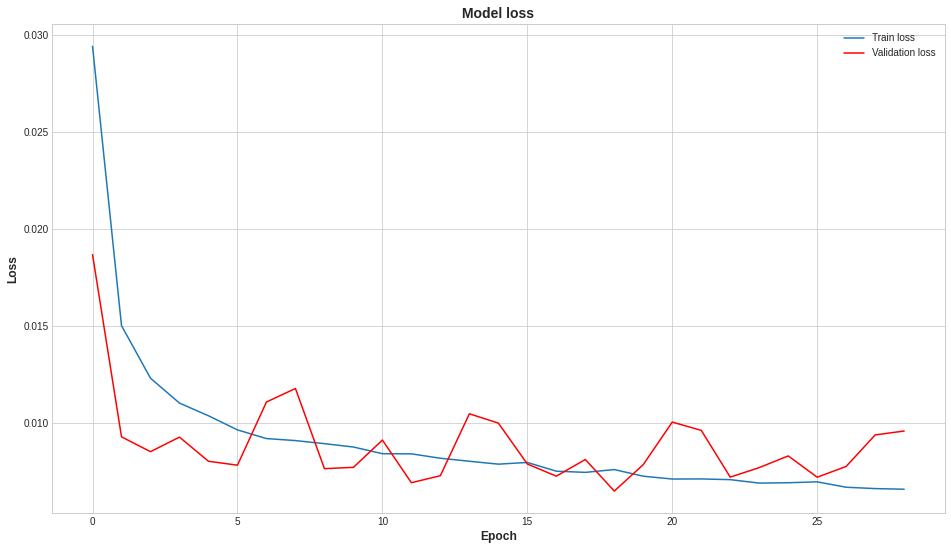

<Figure size 1152x648 with 0 Axes>

In [28]:
# Plot the loss and val_loss against the epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],color='red')
plt.title('Model loss',size=14,fontweight='bold')
plt.ylabel('Loss',size=12,fontweight='semibold')
plt.xlabel('Epoch',size=12,fontweight='semibold')
plt.legend(['Train loss', 'Validation loss'])
plt.figure(figsize=(16,9))
plt.show()

In [29]:
# Check the model summary
Trained_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d (ConvLSTM2D)    (None, 1, 43, 64)         54016     
_________________________________________________________________
dropout (Dropout)            (None, 1, 43, 64)         0         
_________________________________________________________________
flatten (Flatten)            (None, 2752)              0         
_________________________________________________________________
dense (Dense)                (None, 30)                82590     
_________________________________________________________________
dropout_1 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 136,637
Trainable params: 136,637
Non-trainable params: 0
__________________________________________________

In [30]:
# assign the number of days to validate model
val_period = len(df_test) - hist_window - horizon
val_period

1046

In [31]:
# hold back 5 years data from test DataFrame to be used for testing the model
# validate DataFrame
validate = df_test.iloc[:,:].tail(val_period)

In [32]:
# apply transform to test dataset
validateX = pipe.transform(df_test.iloc[:,:-1])

print(validateX[0])
print(validateX.shape)

[0.64915934 0.51788998 0.50394085 0.54875995 0.48451139 0.55653959]
(1137, 6)


In [33]:
# Let’s standardize data
validateY = scaler.transform(df_test[['H']])
validateY[0]

array([0.72302738])

In [34]:
# Prepare test dataset
x_test_multi, y_test_multi = custom_ts_multi_data_prep(
    validateX, validateY, 0, None, hist_window, horizon)
print ('Single window of past history')
print(x_test_multi[0])
print ('\n Target horizon')
print (y_test_multi[0])
print(x_test_multi.shape)

Single window of past history
[[0.64915934 0.51788998 0.50394085 0.54875995 0.48451139 0.55653959]
 [0.66851684 0.51928518 0.50724615 0.53032186 0.48381069 0.55811863]
 [0.54069849 0.52059811 0.51472431 0.54105049 0.49073204 0.55994025]
 [0.52520375 0.52401377 0.54135239 0.56337311 0.50812177 0.56186623]
 [0.66006713 0.52893511 0.47215419 0.58106726 0.50600073 0.5630003 ]
 [0.61980647 0.53002511 0.46396184 0.58793935 0.49413503 0.56430323]
 [0.54690516 0.53147397 0.46821193 0.59788748 0.4860022  0.56561089]
 [0.61902648 0.53397592 0.48774495 0.59145644 0.48348732 0.5669316 ]
 [0.67112889 0.53601291 0.50781313 0.61116535 0.48241117 0.56889276]
 [0.68589755 0.53896876 0.4921757  0.63706688 0.4765243  0.57056298]
 [0.56129766 0.54245054 0.46668908 0.6586765  0.47573379 0.57210809]
 [0.56728687 0.54405029 0.46664991 0.68718521 0.47622433 0.57377269]
 [0.6279826  0.54618582 0.48326568 0.6400578  0.47883479 0.57541952]
 [0.69510202 0.54890682 0.47983288 0.66274938 0.47749432 0.57757889]
 [0.

In [35]:
# reshape for ConvLSTM2D
x_test_multi_ConvLSTM = x_test_multi.reshape((x_test_multi.shape[0], 2, 1,
x_test_multi.shape[1]//2, x_test_multi.shape[2]))
print(x_test_multi_ConvLSTM.shape)

(1046, 2, 1, 45, 6)


In [36]:
# predictions for ConvLSTM2D

predictions = []
for i in x_test_multi_ConvLSTM:
    # predict the daily streamflow
    i_reshape = i.reshape(1, i.shape[0], i.shape[1], i.shape[2], i.shape[3])
    Predicted_results = Trained_model.predict(i_reshape)
    # store the predictions
    predictions.append(Predicted_results)
print(predictions[0])

[[0.5252018]]


In [37]:
# convert prediction list to numpy array
predictions = np.array(predictions).reshape(-1, 1)
print(predictions.shape)

(1046, 1)


In [38]:
# Rescale the predicted values back to the original scale.

predictions_Inv_trans = scaler.inverse_transform(predictions)
print(predictions_Inv_trans[0])
print(predictions_Inv_trans.shape)

[326.15033]
(1046, 1)


In [39]:
# Define the time-series evaluation function

def timeseries_evaluation_metrics_func(y_true, y_pred):
    kgeprime, r, gamma, beta = he.kgeprime(y_pred, y_true)
    kge, r, alpha, beta = he.kge(y_pred, y_true)
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print('Evaluation metric results:-')
    print(f'NSE is : {he.nse(np.array(y_pred), np.array(y_true))}')
    print(f"KGE' is : {kgeprime}")
    print(f'r is : {r}, gamma is : {gamma}')
    print(f'KGE is : {kge}')
    print(f'alpha is : {alpha}, beta is : {beta}')
    print(f'PBIAS is : {he.pbias(np.array(y_pred), np.array(y_true))}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MARE is : {he.mare(np.array(y_pred), np.array(y_true))}')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}') 
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')
timeseries_evaluation_metrics_func(validate['H'].values.reshape(-1, 1),predictions_Inv_trans)

Evaluation metric results:-
NSE is : [0.81560496]
KGE' is : [0.90844417]
r is : [0.90929925], gamma is : [1.00032139]
KGE is : [0.90755362]
alpha is : [1.01280499], beta is : [1.01247962]
PBIAS is : [-1.24796164]
RMSE is : 67.42758804846152
MARE is : [0.15743863]
MSE is : 4546.47963003303
MAE is : 44.592158709611766
MAPE is : 30.312829213134417
R2 is : 0.8156049645251771



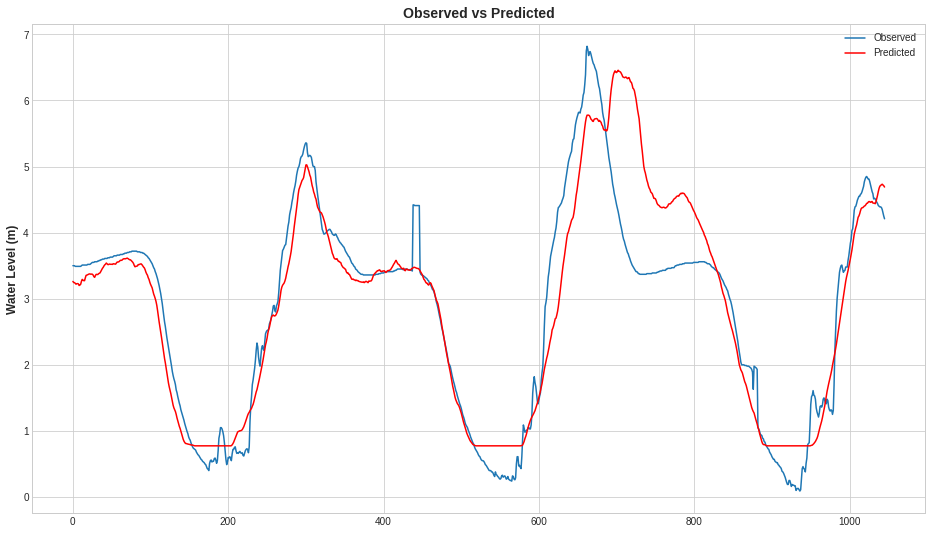

<Figure size 1152x648 with 0 Axes>

In [40]:
# Plot the Observed versus predicted values.
plt.plot( list(validate['H'] / 100))
plt.plot( list(predictions_Inv_trans / 100),color='red')
plt.title("Observed vs Predicted",size=14,fontweight='bold')
plt.ylabel("Water Level (m)",size=12,fontweight='semibold')
plt.legend(('Observed','Predicted'))
plt.figure(figsize=(16,9))
plt.show()

In [41]:
# save GPM IMERGE train loss and val loss to CSV
df_history = pd.DataFrame.from_records([history.history['loss'],history.history['val_loss']], index=['train_loss', 'val_loss']).transpose()
df_history.to_csv('/home/jefire/project/water/models/jiderebode_models/jide_h/jide_h_70_30_split/ConvLSTM_Multi_Jiderebode_H_1step_90days_gpm_relu_minmax_history.csv', index=False)

In [42]:
# Hybrid CNN LSTM

# import all libraries and modules
import tensorflow as tf # deep learning api
import pandas as pd  # for data manipulation
import numpy as np    # for mathematical calculation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten,TimeDistributed,RepeatVector
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import MaxPool1D
from tensorflow.keras.layers import Dropout
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import QuantileTransformer, StandardScaler, MinMaxScaler
tf.random.set_seed(123)
np.random.seed(123)
import datetime
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn import set_config
import hydroeval as he

In [43]:
# reshape input feature for Hybrid CNN LSTM 
x_train_multi_CNN_LSTM = x_train_multi.reshape((x_train_multi.shape[0], 2, 
x_train_multi.shape[1]//2, x_train_multi.shape[2]))
print(x_train_multi_CNN_LSTM.shape)

x_val_multi_CNN_LSTM = x_val_multi.reshape((x_val_multi.shape[0], 2, 
x_val_multi.shape[1]//2, x_val_multi.shape[2]))
print(x_val_multi_CNN_LSTM.shape)

(5214, 2, 45, 6)
(1046, 2, 45, 6)


In [44]:
# Prepare  CNN LSTM training and validation time-series data
BATCH_SIZE = 256
BUFFER_SIZE = 150
train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi_CNN_LSTM, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi_CNN_LSTM, y_val_multi))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

In [45]:
# Define the CNN LSTM model

CNN_LSTM_model = Sequential()
CNN_LSTM_model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu',
input_shape=(None, x_train_multi_CNN_LSTM.shape[2], x_train_multi_CNN_LSTM.shape[3]))))
CNN_LSTM_model.add(TimeDistributed(MaxPool1D(pool_size=2)))
CNN_LSTM_model.add(TimeDistributed(Dropout(0.2)))
CNN_LSTM_model.add(TimeDistributed(Flatten()))
CNN_LSTM_model.add(LSTM(units=100,activation='relu'))
CNN_LSTM_model.add(Dropout(0.2))
CNN_LSTM_model.add(Dense(horizon))
CNN_LSTM_model.compile(optimizer='adam', loss='mse')

In [46]:
# the best weights are stored in model path
model_path = r'/home/jefire/project/water/models/jiderebode_models/jide_h/jide_h_70_30_split/CNN_LSTM_Multi_Jiderebode_H_1step_90days_gpm_relu_minmax.h5'

In [47]:
# Configure the model and start training with early stopping and checkpointing

EVALUATION_INTERVAL = 150
EPOCHS = 500
history = CNN_LSTM_model.fit(train_data_multi, epochs=EPOCHS,
steps_per_epoch=EVALUATION_INTERVAL,validation_data=val_data_multi,
validation_steps=50,verbose =1,callbacks =[tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='min'),
    tf.keras.callbacks.ModelCheckpoint(model_path,monitor='val_loss', 
    save_best_only=True, mode='min', verbose=0)])

Epoch 1/500
150/150 [==============================] - 4s 16ms/step - loss: 0.0383 - val_loss: 0.0148
Epoch 2/500
150/150 [==============================] - 1s 8ms/step - loss: 0.0122 - val_loss: 0.0079
Epoch 3/500
150/150 [==============================] - 1s 8ms/step - loss: 0.0089 - val_loss: 0.0067
Epoch 4/500
150/150 [==============================] - 1s 8ms/step - loss: 0.0083 - val_loss: 0.0081
Epoch 5/500
150/150 [==============================] - 1s 8ms/step - loss: 0.0080 - val_loss: 0.0069
Epoch 6/500
150/150 [==============================] - 1s 8ms/step - loss: 0.0076 - val_loss: 0.0075
Epoch 7/500
150/150 [==============================] - 1s 8ms/step - loss: 0.0071 - val_loss: 0.0099
Epoch 8/500
150/150 [==============================] - 1s 8ms/step - loss: 0.0068 - val_loss: 0.0109
Epoch 9/500
150/150 [==============================] - 1s 8ms/step - loss: 0.0068 - val_loss: 0.0069
Epoch 10/500
150/150 [==============================] - 1s 8ms/step - loss: 0.0062 - val_l

In [48]:
# Load the best weights into the model
Trained_model = tf.keras.models.load_model(model_path)

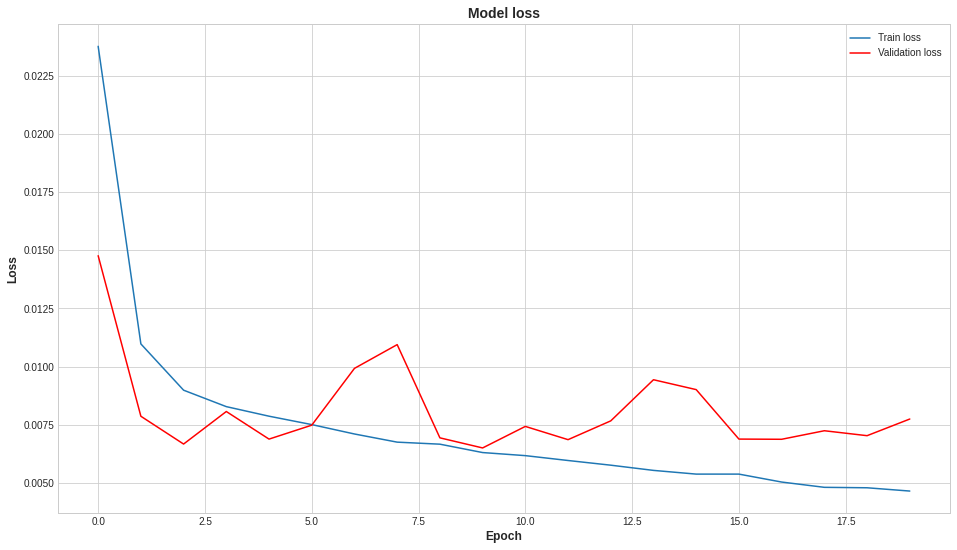

<Figure size 1152x648 with 0 Axes>

In [49]:
# Plot the loss and val_loss against the epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],color='red')
plt.title('Model loss',size=14,fontweight='bold')
plt.ylabel('Loss',size=12,fontweight='semibold')
plt.xlabel('Epoch',size=12,fontweight='semibold')
plt.legend(['Train loss', 'Validation loss'])
plt.figure(figsize=(16,9))
plt.show()

In [50]:
# Check the model summary
Trained_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed (TimeDistri (None, 2, 43, 64)         1216      
_________________________________________________________________
time_distributed_1 (TimeDist (None, 2, 21, 64)         0         
_________________________________________________________________
time_distributed_2 (TimeDist (None, 2, 21, 64)         0         
_________________________________________________________________
time_distributed_3 (TimeDist (None, 2, 1344)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               578000    
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

In [51]:
# reshape for Hybrid CNN LSTM
x_test_multi_CNN_LSTM = x_test_multi.reshape((x_test_multi.shape[0], 2, 
x_test_multi.shape[1]//2, x_test_multi.shape[2]))
print(x_test_multi_CNN_LSTM.shape)
print(len(x_test_multi_CNN_LSTM))

(1046, 2, 45, 6)
1046


In [52]:
# predictions for hybrid CNN LSTM

predictions = []
for i in x_test_multi_CNN_LSTM:
    # predict the daily streamflow
    i_reshape = i.reshape(1, i.shape[0], i.shape[1], i.shape[2])
    Predicted_results = Trained_model.predict(i_reshape)
    # store the predictions
    predictions.append(Predicted_results)
print(predictions[0])

[[0.51588976]]


In [53]:
# convert prediction list to numpy array
predictions = np.array(predictions).reshape(-1, 1)
print(predictions.shape)

(1046, 1)


In [54]:
# Rescale the predicted values back to the original scale.

predictions_Inv_trans = scaler.inverse_transform(predictions)
print(predictions_Inv_trans[0])
print(predictions_Inv_trans.shape)

[320.36755]
(1046, 1)


In [55]:
# correct evaluation metrics

# Define the time-series evaluation function

def timeseries_evaluation_metrics_func(y_true, y_pred):
    kgeprime, r, gamma, beta = he.kgeprime(y_pred, y_true)
    kge, r, alpha, beta = he.kge(y_pred, y_true)
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print('Evaluation metric results:-')
    print(f'NSE is : {he.nse(np.array(y_pred), np.array(y_true))}')
    print(f"KGE' is : {kgeprime}")
    print(f'r is : {r}, gamma is : {gamma}')
    print(f'KGE is : {kge}')
    print(f'alpha is : {alpha}, beta is : {beta}')
    print(f'PBIAS is : {he.pbias(np.array(y_pred), np.array(y_true))}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MARE is : {he.mare(np.array(y_pred), np.array(y_true))}')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}') 
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')
timeseries_evaluation_metrics_func(validate['H'].values.reshape(-1, 1),predictions_Inv_trans)

Evaluation metric results:-
NSE is : [0.89334378]
KGE' is : [0.89169399]
r is : [0.96557787], gamma is : [0.96409577]
KGE is : [0.83570083]
alpha is : [0.87134099], beta is : [0.90379088]
PBIAS is : [9.62091197]
RMSE is : 51.28095405898795
MARE is : [0.141371]
MSE is : 2629.736249200033
MAE is : 40.04124068849173
MAPE is : 22.60197154519796
R2 is : 0.8933437849897184



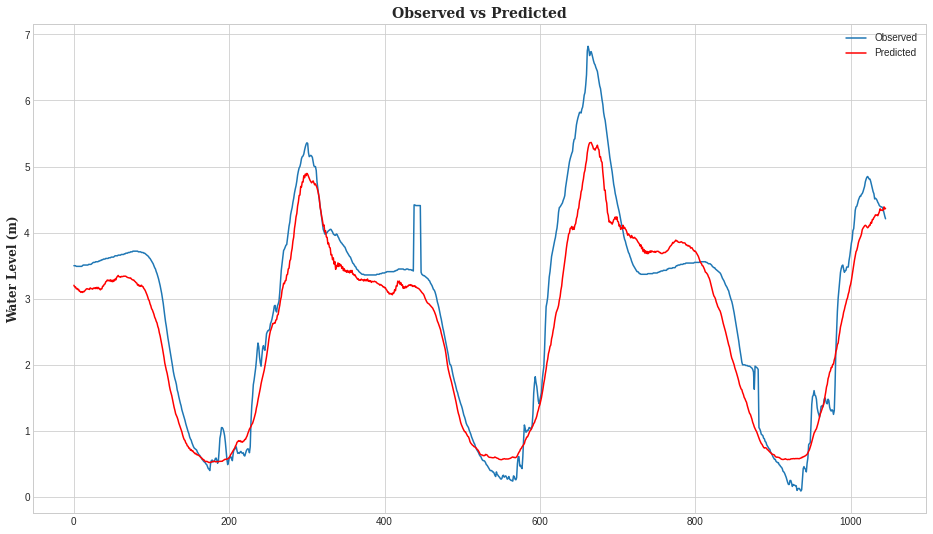

<Figure size 1152x648 with 0 Axes>

In [56]:
# Plot the Observed versus predicted values.
plt.plot( list(validate['H'] / 100))
plt.plot( list(predictions_Inv_trans / 100),color='red')
plt.title("Observed vs Predicted",size=14,fontweight='bold',family='serif')
plt.ylabel("Water Level (m)",size=12,fontweight='semibold',family='serif')
plt.legend(('Observed','Predicted'))  # plt.legend(('Observed','predicted'), loc=' upper left ')
plt.figure(figsize=(16,9))
plt.show()

In [57]:
# save GPM IMERGE train loss and val loss to CSV
df_history = pd.DataFrame.from_records([history.history['loss'],history.history['val_loss']], index=['train_loss', 'val_loss']).transpose()
df_history.to_csv('/home/jefire/project/water/models/jiderebode_models/jide_h/jide_h_70_30_split/CNN_LSTM_Multi_Jiderebode_H_1step_90days_gpm_relu_minmax_history.csv', index=False)

In [58]:
# Hybrid CNN GRU

# import all libraries and modules
import tensorflow as tf # deep learning api
import pandas as pd  # for data manipulation
import numpy as np    # for mathematical calculation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten,TimeDistributed,RepeatVector
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import MaxPool1D
from tensorflow.keras.layers import Dropout
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import QuantileTransformer, StandardScaler, MinMaxScaler
tf.random.set_seed(123)
np.random.seed(123)
import datetime
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn import set_config
import hydroeval as he

In [59]:
# tensorflow version
tf.__version__

'2.4.1'

In [60]:
# reshape input feature for Hybrid CNN GRU 
x_train_multi_CNN_GRU = x_train_multi.reshape((x_train_multi.shape[0], 2, 
x_train_multi.shape[1]//2, x_train_multi.shape[2]))
print(x_train_multi_CNN_GRU.shape)

x_val_multi_CNN_GRU = x_val_multi.reshape((x_val_multi.shape[0], 2, 
x_val_multi.shape[1]//2, x_val_multi.shape[2]))
print(x_val_multi_CNN_GRU.shape)
print(len(x_val_multi_CNN_GRU))

(5214, 2, 45, 6)
(1046, 2, 45, 6)
1046


In [61]:
# Prepare  CNN GRU training and validation time-series data
BATCH_SIZE = 256
BUFFER_SIZE = 150
train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi_CNN_GRU, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi_CNN_GRU, y_val_multi))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

In [62]:
# Define the CNN GRU model

CNN_GRU_model = Sequential()
CNN_GRU_model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu',
input_shape=(None, x_train_multi_CNN_GRU.shape[2], x_train_multi_CNN_GRU.shape[3]))))
CNN_GRU_model.add(TimeDistributed(MaxPool1D(pool_size=2)))
CNN_GRU_model.add(TimeDistributed(Dropout(0.2)))
CNN_GRU_model.add(TimeDistributed(Flatten()))
CNN_GRU_model.add(GRU(units=100,activation='relu'))
CNN_GRU_model.add(Dropout(0.2))
CNN_GRU_model.add(Dense(horizon))
CNN_GRU_model.compile(optimizer='adam', loss='mse')

In [63]:
# the best weights are stored in model path
model_path = r'/home/jefire/project/water/models/jiderebode_models/jide_h/jide_h_70_30_split/CNN_GRU_Multi_Jiderebode_H_1step_90days_gpm_relu_minmax.h5'

In [64]:
# Configure the model and start training with early stopping and checkpointing

EVALUATION_INTERVAL = 150
EPOCHS = 500
history = CNN_GRU_model.fit(train_data_multi, epochs=EPOCHS,
steps_per_epoch=EVALUATION_INTERVAL,validation_data=val_data_multi,
validation_steps=50,verbose =1,callbacks =[tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='min'),
    tf.keras.callbacks.ModelCheckpoint(model_path,monitor='val_loss', 
    save_best_only=True, mode='min', verbose=0)])

Epoch 1/500
150/150 [==============================] - 3s 11ms/step - loss: 0.0463 - val_loss: 0.0146
Epoch 2/500
150/150 [==============================] - 1s 8ms/step - loss: 0.0127 - val_loss: 0.0083
Epoch 3/500
150/150 [==============================] - 1s 8ms/step - loss: 0.0097 - val_loss: 0.0067
Epoch 4/500
150/150 [==============================] - 1s 8ms/step - loss: 0.0091 - val_loss: 0.0080
Epoch 5/500
150/150 [==============================] - 1s 9ms/step - loss: 0.0086 - val_loss: 0.0083
Epoch 6/500
150/150 [==============================] - 1s 8ms/step - loss: 0.0078 - val_loss: 0.0072
Epoch 7/500
150/150 [==============================] - 1s 8ms/step - loss: 0.0073 - val_loss: 0.0107
Epoch 8/500
150/150 [==============================] - 1s 8ms/step - loss: 0.0070 - val_loss: 0.0099
Epoch 9/500
150/150 [==============================] - 1s 8ms/step - loss: 0.0069 - val_loss: 0.0069
Epoch 10/500
150/150 [==============================] - 1s 8ms/step - loss: 0.0065 - val_l

In [65]:
# Load the best weights into the model
Trained_model = tf.keras.models.load_model(model_path)

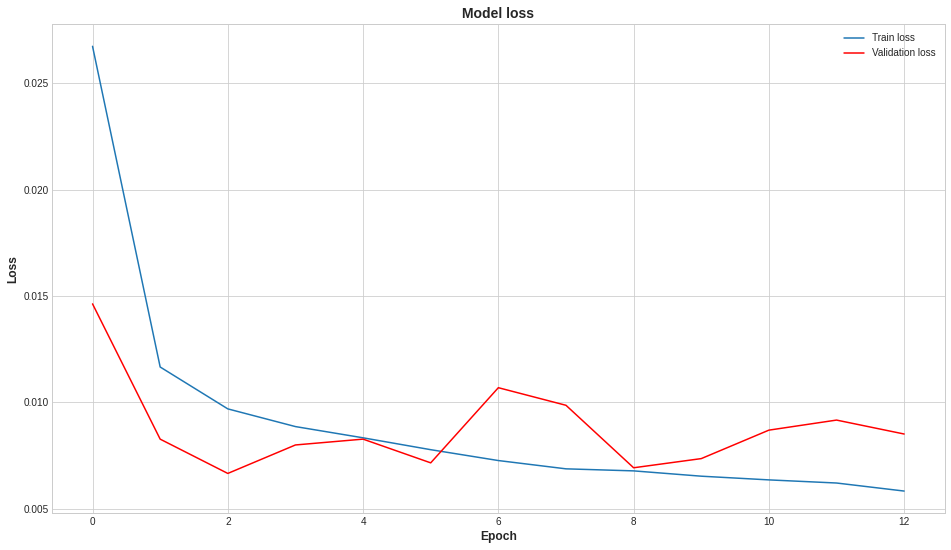

<Figure size 1152x648 with 0 Axes>

In [66]:
# Plot the loss and val_loss against the epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],color='red')
plt.title('Model loss',size=14,fontweight='bold')
plt.ylabel('Loss',size=12,fontweight='semibold')
plt.xlabel('Epoch',size=12,fontweight='semibold')
plt.legend(['Train loss', 'Validation loss'])
plt.figure(figsize=(16,9))
plt.show()

In [67]:
# Check the model summary
Trained_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_4 (TimeDist (None, 2, 43, 64)         1216      
_________________________________________________________________
time_distributed_5 (TimeDist (None, 2, 21, 64)         0         
_________________________________________________________________
time_distributed_6 (TimeDist (None, 2, 21, 64)         0         
_________________________________________________________________
time_distributed_7 (TimeDist (None, 2, 1344)           0         
_________________________________________________________________
gru (GRU)                    (None, 100)               433800    
_________________________________________________________________
dropout_5 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

In [68]:
# reshape for Hybrid CNN GRU
x_test_multi_CNN_GRU = x_test_multi.reshape((x_test_multi.shape[0], 2, 
x_test_multi.shape[1]//2, x_test_multi.shape[2]))
print(x_test_multi_CNN_GRU.shape)
print(len(x_test_multi_CNN_GRU))

(1046, 2, 45, 6)
1046


In [69]:
# predictions for hybrid CNN GRU

predictions = []
for i in x_test_multi_CNN_GRU:
    # predict the daily streamflow
    i_reshape = i.reshape(1, i.shape[0], i.shape[1], i.shape[2])
    Predicted_results = Trained_model.predict(i_reshape)
    # store the predictions
    predictions.append(Predicted_results)
print(predictions[0])

[[0.5233893]]


In [70]:
# convert prediction list to numpy array
predictions = np.array(predictions).reshape(-1, 1)
print(predictions.shape)

(1046, 1)


In [71]:
# Rescale the predicted values back to the original scale.

predictions_Inv_trans = scaler.inverse_transform(predictions)
print(predictions_Inv_trans[0])
print(predictions_Inv_trans.shape)

[325.02475]
(1046, 1)


In [72]:
# correct evaluation metrics

# Define the time-series evaluation function

def timeseries_evaluation_metrics_func(y_true, y_pred):
    kgeprime, r, gamma, beta = he.kgeprime(y_pred, y_true)
    kge, r, alpha, beta = he.kge(y_pred, y_true)
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print('Evaluation metric results:-')
    print(f'NSE is : {he.nse(np.array(y_pred), np.array(y_true))}')
    print(f"KGE' is : {kgeprime}")
    print(f'r is : {r}, gamma is : {gamma}')
    print(f'KGE is : {kge}')
    print(f'alpha is : {alpha}, beta is : {beta}')
    print(f'PBIAS is : {he.pbias(np.array(y_pred), np.array(y_true))}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MARE is : {he.mare(np.array(y_pred), np.array(y_true))}')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}') 
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')
timeseries_evaluation_metrics_func(validate['H'].values.reshape(-1, 1),predictions_Inv_trans)

Evaluation metric results:-
NSE is : [0.87037626]
KGE' is : [0.90305581]
r is : [0.94400559], gamma is : [0.98243644]
KGE is : [0.86655291]
alpha is : [0.90662748], beta is : [0.92283574]
PBIAS is : [7.7164259]
RMSE is : 56.53342377865268
MARE is : [0.14905675]
MSE is : 3196.0280041367328
MAE is : 42.218114265748234
MAPE is : 20.47275374714605
R2 is : 0.8703762591812076



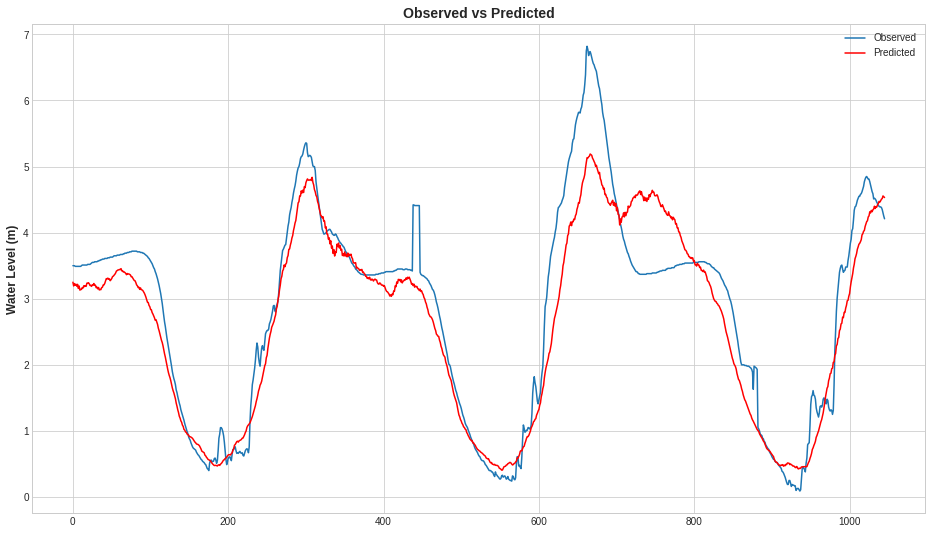

<Figure size 1152x648 with 0 Axes>

In [73]:
# Plot the Observed versus predicted values.
plt.plot( list(validate['H'] / 100))
plt.plot( list(predictions_Inv_trans / 100),color='red')
plt.title("Observed vs Predicted",size=14,fontweight='bold')
plt.ylabel("Water Level (m)",size=12,fontweight='semibold')
plt.legend(('Observed','Predicted'))
plt.figure(figsize=(16,9))
plt.show()

In [74]:
# save GPM IMERGE train loss and val loss to CSV
df_history = pd.DataFrame.from_records([history.history['loss'],history.history['val_loss']], index=['train_loss', 'val_loss']).transpose()
df_history.to_csv('/home/jefire/project/water/models/jiderebode_models/jide_h/jide_h_70_30_split/CNN_GRU_Multi_Jiderebode_H_1step_90days_gpm_relu_minmax_history.csv', index=False)

In [75]:
# 4th Model
# Auto-encoder LSTM Model

# import all libraries and modules
import tensorflow as tf # deep learning api
import pandas as pd  # for data manipulation
import numpy as np    # for mathematical calculation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,TimeDistributed,RepeatVector
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import QuantileTransformer, StandardScaler, MinMaxScaler
tf.random.set_seed(123)
np.random.seed(123)
import datetime
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn import set_config
import hydroeval as he

In [76]:
# Prepare the training and validation time-series data
BATCH_SIZE = 256
BUFFER_SIZE = 150
train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi, y_val_multi))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

In [77]:
# Define the Auto-encoder LSTM model

# Define the auto-encoder LSTM model.
ED_lstm_model = Sequential([
    LSTM(40, activation='relu',input_shape=x_train_multi.shape[-2:], 
    return_sequences=True),
    LSTM(units=20,activation='relu',return_sequences=True),
    LSTM(units=15),
    RepeatVector(y_train_multi.shape[1]),
    LSTM(units=40,activation='relu',return_sequences=True),
    LSTM(units=25,activation='relu',return_sequences=True),
    TimeDistributed(tf.keras.layers.Dense(units=1))
])
ED_lstm_model.compile(optimizer='adam', loss='mse')

In [78]:
# the best weights are stored in model path
model_path = r'/home/jefire/project/water/models/jiderebode_models/jide_h/jide_h_70_30_split/ED_LSTM_Multi_Jiderebode_H_1step_90days_gpm_relu_minmax.h5'

In [79]:
# Configure the model and start training with early stopping and checkpointing

EVALUATION_INTERVAL = 150
EPOCHS = 500
history = ED_lstm_model.fit(train_data_multi, epochs=EPOCHS,
steps_per_epoch=EVALUATION_INTERVAL,validation_data=val_data_multi,
validation_steps=50,verbose =1,callbacks =[tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='min'),
    tf.keras.callbacks.ModelCheckpoint(model_path,monitor='val_loss', 
    save_best_only=True, mode='min', verbose=0)])

Epoch 1/500
150/150 [==============================] - 35s 207ms/step - loss: 0.1158 - val_loss: 0.0213
Epoch 2/500
150/150 [==============================] - 31s 206ms/step - loss: 0.0122 - val_loss: 0.0110
Epoch 3/500
150/150 [==============================] - 30s 202ms/step - loss: 0.0093 - val_loss: 0.0110
Epoch 4/500
150/150 [==============================] - 31s 204ms/step - loss: 0.0088 - val_loss: 0.0102
Epoch 5/500
150/150 [==============================] - 31s 204ms/step - loss: 0.0091 - val_loss: 0.0104
Epoch 6/500
150/150 [==============================] - 30s 203ms/step - loss: 0.0081 - val_loss: 0.0092
Epoch 7/500
150/150 [==============================] - 31s 204ms/step - loss: 0.0069 - val_loss: 0.0127
Epoch 8/500
150/150 [==============================] - 31s 205ms/step - loss: 0.0069 - val_loss: 0.0121
Epoch 9/500
150/150 [==============================] - 30s 202ms/step - loss: 0.0066 - val_loss: 0.0068
Epoch 10/500
150/150 [==============================] - 30s 202m

In [80]:
# Load the best weights into the model
Trained_model = tf.keras.models.load_model(model_path)

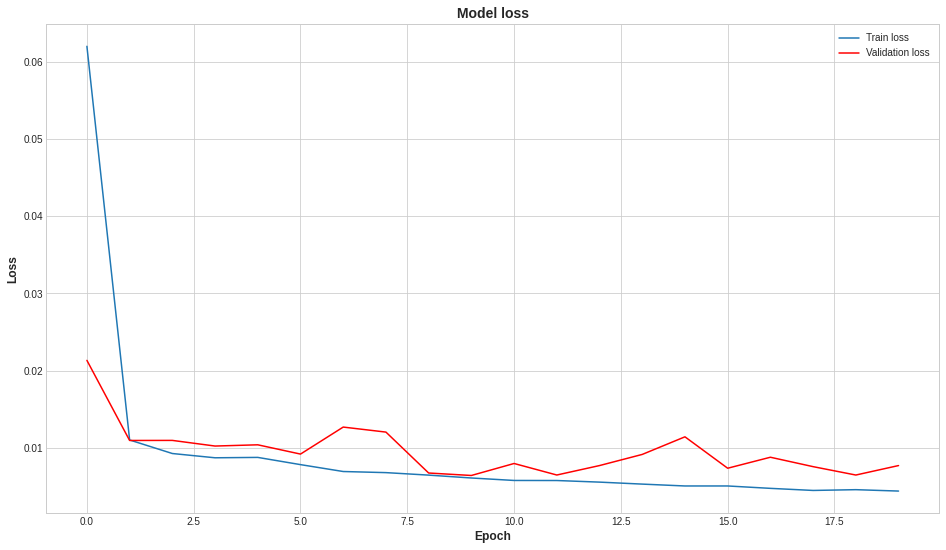

<Figure size 1152x648 with 0 Axes>

In [81]:
# Plot the loss and val_loss against the epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],color='red')
plt.title('Model loss',size=14,fontweight='bold')
plt.ylabel('Loss',size=12,fontweight='semibold')
plt.xlabel('Epoch',size=12,fontweight='semibold')
plt.legend(['Train loss', 'Validation loss'])
plt.figure(figsize=(16,9))
plt.show()

In [82]:
# Check the model summary
Trained_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 90, 40)            7520      
_________________________________________________________________
lstm_2 (LSTM)                (None, 90, 20)            4880      
_________________________________________________________________
lstm_3 (LSTM)                (None, 15)                2160      
_________________________________________________________________
repeat_vector (RepeatVector) (None, 1, 15)             0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 1, 40)             8960      
_________________________________________________________________
lstm_5 (LSTM)                (None, 1, 25)             6600      
_________________________________________________________________
time_distributed_8 (TimeDist (None, 1, 1)             

In [83]:
# predictions for AutoEncoder

predictions = []
for i in x_test_multi:
    # predict the daily streamflow
    i_reshape = i.reshape(1, i.shape[0], i.shape[1])
    Predicted_results = Trained_model.predict(i_reshape)
    # store the predictions
    predictions.append(Predicted_results)
print(predictions[0])

[[[0.46925312]]]


In [84]:
# convert prediction list to numpy array
predictions = np.array(predictions).reshape(-1, 1)
print(predictions.shape)

(1046, 1)


In [85]:
# Rescale the predicted values back to the original scale.

predictions_Inv_trans = scaler.inverse_transform(predictions)
print(predictions_Inv_trans[0])
print(predictions_Inv_trans.shape)
print(len(predictions_Inv_trans))

[291.4062]
(1046, 1)
1046


In [86]:
# Define the time-series evaluation function

def timeseries_evaluation_metrics_func(y_true, y_pred):
    kgeprime, r, gamma, beta = he.kgeprime(y_pred, y_true)
    kge, r, alpha, beta = he.kge(y_pred, y_true)
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print('Evaluation metric results:-')
    print(f'NSE is : {he.nse(np.array(y_pred), np.array(y_true))}')
    print(f"KGE' is : {kgeprime}")
    print(f'r is : {r}, gamma is : {gamma}')
    print(f'KGE is : {kge}')
    print(f'alpha is : {alpha}, beta is : {beta}')
    print(f'PBIAS is : {he.pbias(np.array(y_pred), np.array(y_true))}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MARE is : {he.mare(np.array(y_pred), np.array(y_true))}')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}') 
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')
timeseries_evaluation_metrics_func(validate['H'].values.reshape(-1, 1),predictions_Inv_trans)

Evaluation metric results:-
NSE is : [0.81043053]
KGE' is : [0.87134755]
r is : [0.91428315], gamma is : [1.04293699]
KGE is : [0.87010065]
alpha is : [0.95345998], beta is : [0.9142067]
PBIAS is : [8.5793299]
RMSE is : 68.36710774767872
MARE is : [0.17998736]
MSE is : 4674.061421782711
MAE is : 50.978753879466886
MAPE is : 25.78325182633785
R2 is : 0.8104305326724046



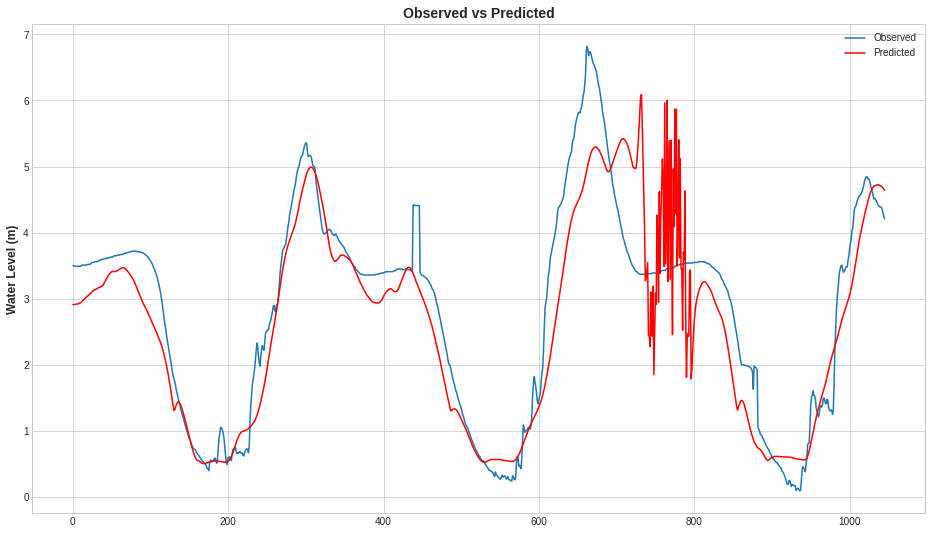

<Figure size 1152x648 with 0 Axes>

In [87]:
# Plot the Observed versus predicted values.
plt.plot( list(validate['H'] / 100))
plt.plot( list(predictions_Inv_trans / 100),color='red')
plt.title("Observed vs Predicted",size=14,fontweight='bold')
plt.ylabel("Water Level (m)",size=12,fontweight='semibold')
plt.legend(('Observed','Predicted'))
plt.figure(figsize=(16,9))
plt.show()

In [88]:
# save GPM IMERGE train loss and val loss to CSV
df_history = pd.DataFrame.from_records([history.history['loss'],history.history['val_loss']], index=['train_loss', 'val_loss']).transpose()
df_history.to_csv('/home/jefire/project/water/models/jiderebode_models/jide_h/jide_h_70_30_split/ED_LSTM_Multi_Jiderebode_H_1step_90days_gpm_relu_minmax_history.csv', index=False)

In [89]:
# 5th Model
# CNN Model

# import all libraries and modules
import tensorflow as tf # deep learning api
import pandas as pd  # for data manipulation
import numpy as np    # for mathematical calculation
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv1D, MaxPool1D, Dropout
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import QuantileTransformer, StandardScaler, MinMaxScaler
tf.random.set_seed(123)
np.random.seed(123)
import datetime
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn import set_config
import hydroeval as he

In [90]:
# Prepare the training and validation time-series data
BATCH_SIZE = 256
BUFFER_SIZE = 150
train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi, y_val_multi))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

In [91]:
# Define the CNN model

CNN_model = Sequential()
CNN_model.add(Conv1D(filters=64, kernel_size=3, activation='relu',
input_shape=(x_train_multi.shape[1], x_train_multi.shape[2])))
CNN_model.add(MaxPool1D(pool_size=2))
CNN_model.add(Dropout(0.2))
CNN_model.add(Flatten())
CNN_model.add(Dense(30, activation='relu'))
CNN_model.add(Dropout(0.2))
CNN_model.add(Dense(horizon))
CNN_model.compile(optimizer='adam', loss='mse')

In [92]:
# the best weights are stored in model path
model_path = r'/home/jefire/project/water/models/jiderebode_models/jide_h/jide_h_70_30_split/CNN_Multi_Jiderebode_H_1step_90days_gpm_relu_minmax.h5'

In [93]:
# Configure the model and start training with early stopping and checkpointing

EVALUATION_INTERVAL = 150
EPOCHS = 500
history = CNN_model.fit(train_data_multi, epochs=EPOCHS,
steps_per_epoch=EVALUATION_INTERVAL,validation_data=val_data_multi,
validation_steps=50,verbose =1,callbacks =[tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='min'),
    tf.keras.callbacks.ModelCheckpoint(model_path,monitor='val_loss', 
    save_best_only=True, mode='min', verbose=0)])

Epoch 1/500
150/150 [==============================] - 3s 13ms/step - loss: 0.0502 - val_loss: 0.0134
Epoch 2/500
150/150 [==============================] - 1s 5ms/step - loss: 0.0143 - val_loss: 0.0074
Epoch 3/500
150/150 [==============================] - 1s 5ms/step - loss: 0.0117 - val_loss: 0.0074
Epoch 4/500
150/150 [==============================] - 1s 5ms/step - loss: 0.0107 - val_loss: 0.0090
Epoch 5/500
150/150 [==============================] - 1s 5ms/step - loss: 0.0107 - val_loss: 0.0072
Epoch 6/500
150/150 [==============================] - 1s 5ms/step - loss: 0.0099 - val_loss: 0.0078
Epoch 7/500
150/150 [==============================] - 1s 4ms/step - loss: 0.0094 - val_loss: 0.0115
Epoch 8/500
150/150 [==============================] - 1s 4ms/step - loss: 0.0094 - val_loss: 0.0111
Epoch 9/500
150/150 [==============================] - 1s 4ms/step - loss: 0.0097 - val_loss: 0.0074
Epoch 10/500
150/150 [==============================] - 1s 4ms/step - loss: 0.0090 - val_l

In [94]:
# Load the best weights into the model
Trained_model = tf.keras.models.load_model(model_path)

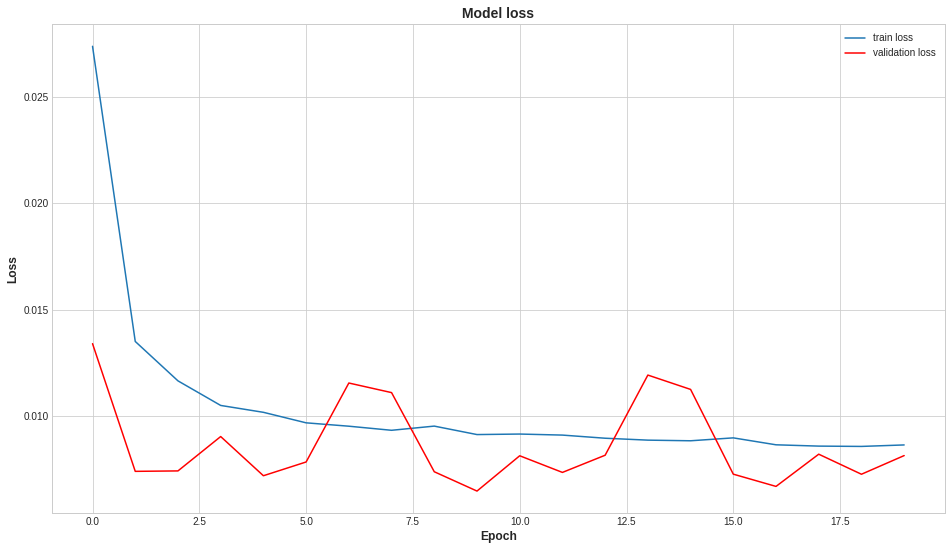

<Figure size 1152x648 with 0 Axes>

In [95]:
# Plot the loss and val_loss against the epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],color='red')
plt.title('Model loss',size=14,fontweight='bold')
plt.ylabel('Loss',size=12,fontweight='semibold')
plt.xlabel('Epoch',size=12,fontweight='semibold')
plt.legend(['train loss', 'validation loss'])
plt.figure(figsize=(16,9))
plt.show()

In [96]:
# Check the model summary
Trained_model.summary()

# Prepare test dataset
x_test_multi, y_test_multi = custom_ts_multi_data_prep(
    validateX, validateY, 0, None, hist_window, horizon)
print ('Single window of past history')
print(x_test_multi[0])
print ('\n Target horizon')
print (y_test_multi[0])
print(len(y_test_multi))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 88, 64)            1216      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 44, 64)            0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 44, 64)            0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 2816)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 30)                84510     
_________________________________________________________________
dropout_7 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                

In [97]:
# predictions for CNN

predictions = []
for i in x_test_multi:
    # predict the daily streamflow
    i_reshape = i.reshape(1, i.shape[0], i.shape[1])
    Predicted_results = Trained_model.predict(i_reshape)
    # store the predictions
    predictions.append(Predicted_results)
print(predictions[0])

[[0.5197669]]


In [98]:
# convert prediction list to numpy array
predictions = np.array(predictions).reshape(-1, 1)
print(predictions.shape)

(1046, 1)


In [99]:
# Rescale the predicted values back to the original scale.

predictions_Inv_trans = scaler.inverse_transform(predictions)
print(predictions_Inv_trans[0])
print(predictions_Inv_trans.shape)
print(len(predictions_Inv_trans))

[322.77527]
(1046, 1)
1046


In [100]:
# Define the time-series evaluation function

def timeseries_evaluation_metrics_func(y_true, y_pred):
    kgeprime, r, gamma, beta = he.kgeprime(y_pred, y_true)
    kge, r, alpha, beta = he.kge(y_pred, y_true)
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print('Evaluation metric results:-')
    print(f'NSE is : {he.nse(np.array(y_pred), np.array(y_true))}')
    print(f"KGE' is : {kgeprime}")
    print(f'r is : {r}, gamma is : {gamma}')
    print(f'KGE is : {kge}')
    print(f'alpha is : {alpha}, beta is : {beta}')
    print(f'PBIAS is : {he.pbias(np.array(y_pred), np.array(y_true))}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MARE is : {he.mare(np.array(y_pred), np.array(y_true))}')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}') 
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')
timeseries_evaluation_metrics_func(validate['H'].values.reshape(-1, 1),predictions_Inv_trans)

Evaluation metric results:-
NSE is : [0.86568727]
KGE' is : [0.89007062]
r is : [0.93606708], gamma is : [0.92438969]
KGE is : [0.85609819]
alpha is : [0.8802495], beta is : [0.95224929]
PBIAS is : [4.77507074]
RMSE is : 57.54685616304739
MARE is : [0.1574778]
MSE is : 3311.6406542504646
MAE is : 44.603252804757986
MAPE is : 32.543064255482015
R2 is : 0.8656872689175682



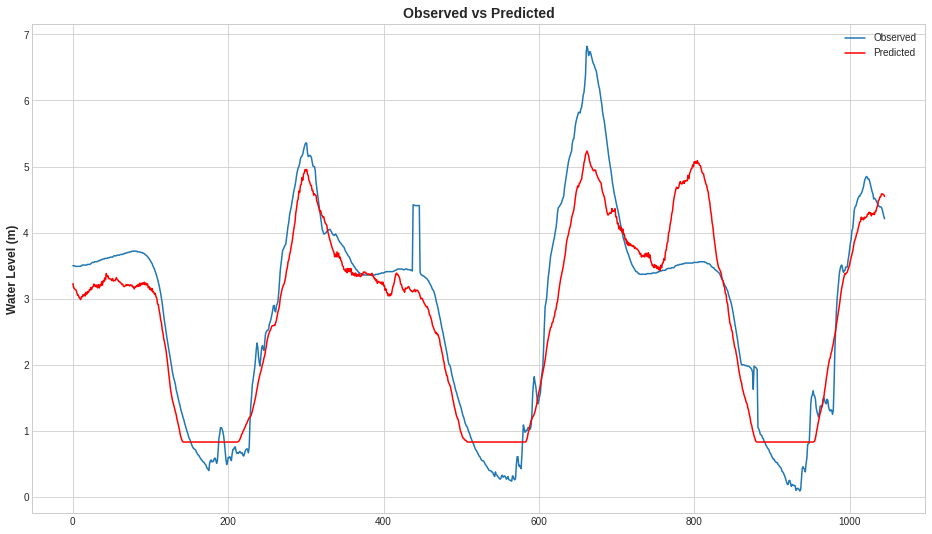

<Figure size 1152x648 with 0 Axes>

In [101]:
# Plot the Observed versus predicted values.
plt.plot( list(validate['H'] / 100))
plt.plot( list(predictions_Inv_trans / 100),color='red')
plt.title("Observed vs Predicted",size=14,fontweight='bold')
plt.ylabel("Water Level (m)",size=12,fontweight='semibold')
plt.legend(('Observed','Predicted'))
plt.figure(figsize=(16,9))
plt.show()

In [102]:
# save GPM IMERGE train loss and val loss to CSV
df_history = pd.DataFrame.from_records([history.history['loss'],history.history['val_loss']], index=['train_loss', 'val_loss']).transpose()
df_history.to_csv('/home/jefire/project/water/models/jiderebode_models/jide_h/jide_h_70_30_split/CNN_Multi_Jiderebode_H_1step_90days_gpm_relu_minmax_history.csv', index=False)

In [103]:
# 6th Model
# LSTM Model

# import all libraries and modules
import tensorflow as tf # deep learning api
import pandas as pd  # for data manipulation
import numpy as np    # for mathematical calculation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import QuantileTransformer, StandardScaler, MinMaxScaler
tf.random.set_seed(123)
np.random.seed(123)
import datetime
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn import set_config
import hydroeval as he

In [104]:
# Prepare the training and validation time-series data
BATCH_SIZE = 256
BUFFER_SIZE = 150
train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi, y_val_multi))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

In [105]:
# Define the LSTM model

lstm_multi = Sequential()
lstm_multi.add(LSTM(
    150,activation='relu',input_shape=x_train_multi.shape[-2:],return_sequences=True))
lstm_multi.add(Dropout(0.2)),
lstm_multi.add(LSTM(units=100,activation='relu',return_sequences=False)),
lstm_multi.add(Dropout(0.2)),
lstm_multi.add(Dense(units=horizon)),
lstm_multi.compile(optimizer='adam', loss='mse')

In [106]:
# the best weights are stored in model path
model_path = r'/home/jefire/project/water/models/jiderebode_models/jide_h/jide_h_70_30_split/LSTM_Multi_Jiderebode_H_1step_90days_gpm_relu_minmax.h5'

In [107]:
# Configure the model and start training with early stopping and checkpointing

EVALUATION_INTERVAL = 150
EPOCHS = 500
history = lstm_multi.fit(train_data_multi, epochs=EPOCHS,
steps_per_epoch=EVALUATION_INTERVAL,validation_data=val_data_multi,
validation_steps=50,verbose =1,callbacks =[tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='min'),
    tf.keras.callbacks.ModelCheckpoint(model_path,monitor='val_loss', 
    save_best_only=True, mode='min', verbose=0)])

Epoch 1/500
150/150 [==============================] - 32s 204ms/step - loss: 0.0416 - val_loss: 0.0152
Epoch 2/500
150/150 [==============================] - 30s 199ms/step - loss: 0.0125 - val_loss: 0.0103
Epoch 3/500
150/150 [==============================] - 30s 200ms/step - loss: 0.0108 - val_loss: 0.0099
Epoch 4/500
150/150 [==============================] - 30s 199ms/step - loss: 0.0100 - val_loss: 0.0094
Epoch 5/500
150/150 [==============================] - 30s 199ms/step - loss: 0.0096 - val_loss: 0.0082
Epoch 6/500
150/150 [==============================] - 30s 202ms/step - loss: 0.0091 - val_loss: 0.0117
Epoch 7/500
150/150 [==============================] - 30s 200ms/step - loss: 0.0082 - val_loss: 0.0123
Epoch 8/500
150/150 [==============================] - 30s 198ms/step - loss: 0.0174 - val_loss: 0.0213
Epoch 9/500
150/150 [==============================] - 30s 200ms/step - loss: 0.0138 - val_loss: 0.0116
Epoch 10/500
150/150 [==============================] - 30s 201m

In [108]:
# Load the best weights into the model
Trained_model = tf.keras.models.load_model(model_path)

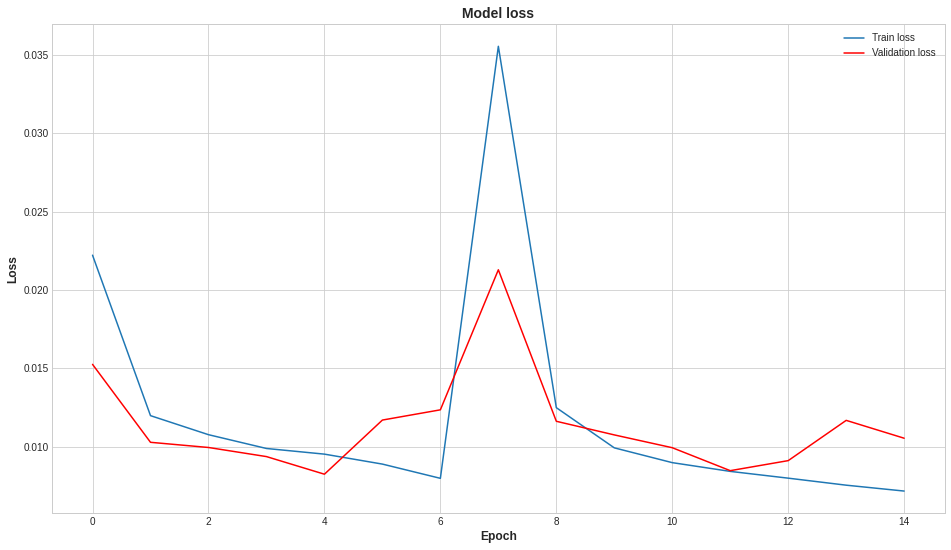

<Figure size 1152x648 with 0 Axes>

In [109]:
# Plot the loss and val_loss against the epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],color='red')
plt.title('Model loss',size=14,fontweight='bold')
plt.ylabel('Loss',size=12,fontweight='semibold')
plt.xlabel('Epoch',size=12,fontweight='semibold')
plt.legend(['Train loss', 'Validation loss'])
plt.figure(figsize=(16,9))
plt.show()

In [110]:
# Check the model summary
Trained_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 90, 150)           94200     
_________________________________________________________________
dropout_8 (Dropout)          (None, 90, 150)           0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 100)               100400    
_________________________________________________________________
dropout_9 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 194,701
Trainable params: 194,701
Non-trainable params: 0
_________________________________________________________________


In [111]:
# predictions for LSTM

predictions = []
for i in x_test_multi:
    # predict the daily streamflow
    i_reshape = i.reshape(1, i.shape[0], i.shape[1])
    Predicted_results = Trained_model.predict(i_reshape)
    # store the predictions
    predictions.append(Predicted_results)
print(predictions[0])

[[0.5809547]]


In [112]:
# convert prediction list to numpy array
predictions = np.array(predictions).reshape(-1, 1)
print(predictions.shape)

(1046, 1)


In [113]:
# Rescale the predicted values back to the original scale.

predictions_Inv_trans = scaler.inverse_transform(predictions)
print(predictions_Inv_trans[0])
print(predictions_Inv_trans.shape)
print(len(predictions_Inv_trans))

[360.77286]
(1046, 1)
1046


In [114]:
# correct evaluation metrics

# Define the time-series evaluation function

def timeseries_evaluation_metrics_func(y_true, y_pred):
    kgeprime, r, gamma, beta = he.kgeprime(y_pred, y_true)
    kge, r, alpha, beta = he.kge(y_pred, y_true)
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print('Evaluation metric results:-')
    print(f'NSE is : {he.nse(np.array(y_pred), np.array(y_true))}')
    print(f"KGE' is : {kgeprime}")
    print(f'r is : {r}, gamma is : {gamma}')
    print(f'KGE is : {kge}')
    print(f'alpha is : {alpha}, beta is : {beta}')
    print(f'PBIAS is : {he.pbias(np.array(y_pred), np.array(y_true))}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MARE is : {he.mare(np.array(y_pred), np.array(y_true))}')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}') 
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')
timeseries_evaluation_metrics_func(validate['H'].values.reshape(-1, 1),predictions_Inv_trans)

Evaluation metric results:-
NSE is : [0.80734117]
KGE' is : [0.86347868]
r is : [0.921562], gamma is : [0.98382486]
KGE is : [0.81564004]
alpha is : [0.87505138], beta is : [0.88943818]
PBIAS is : [11.0561819]
RMSE is : 68.92193662746989
MARE is : [0.1772353]
MSE is : 4750.233348480976
MAE is : 50.19927147743123
MAPE is : 23.22070347648137
R2 is : 0.8073411698535481



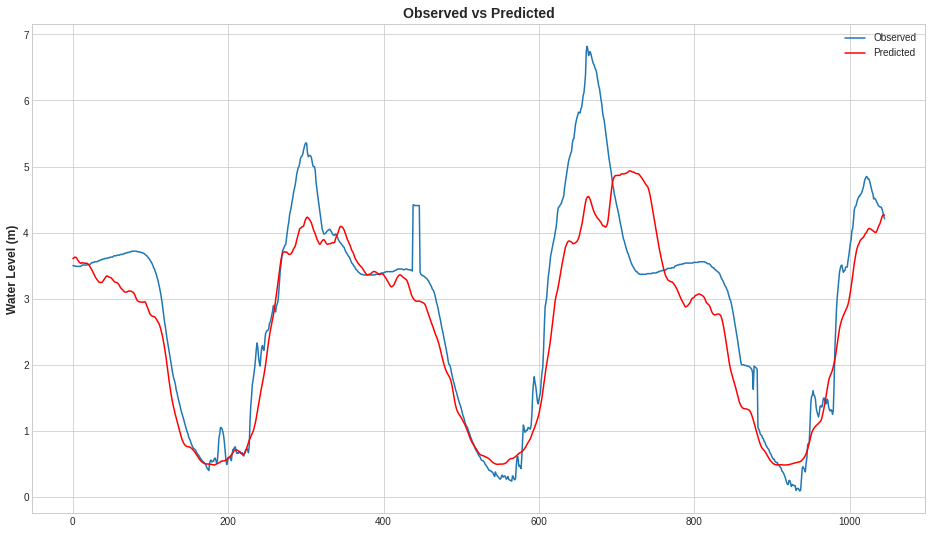

<Figure size 1152x648 with 0 Axes>

In [115]:
# Plot the Observed versus predicted values.
plt.plot( list(validate['H'] / 100))
plt.plot( list(predictions_Inv_trans / 100),color='red')
plt.title("Observed vs Predicted",size=14,fontweight='bold')
plt.ylabel("Water Level (m)",size=12,fontweight='semibold')
plt.legend(('Observed','Predicted'))
plt.figure(figsize=(16,9))
plt.show()

In [116]:
# save GPM IMERGE train loss and val loss to CSV
df_history = pd.DataFrame.from_records([history.history['loss'],history.history['val_loss']], index=['train_loss', 'val_loss']).transpose()
df_history.to_csv('/home/jefire/project/water/models/jiderebode_models/jide_h/jide_h_70_30_split/LSTM_Multi_Jiderebode_H_1step_90days_gpm_relu_minmax_history.csv', index=False)

In [117]:
# 7th Model
# GRU Model

# import all libraries and modules
import tensorflow as tf # deep learning api
import pandas as pd  # for data manipulation
import numpy as np    # for mathematical calculation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dropout
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import QuantileTransformer, StandardScaler, MinMaxScaler
tf.random.set_seed(123)
np.random.seed(123)
import datetime
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn import set_config
import hydroeval as he

In [118]:
# # Define the GRU model

GRU_model = Sequential([
    GRU(100, activation='relu', input_shape=x_train_multi.shape[-2:],return_sequences=True),
    Dropout(0.2),
    GRU(units=50,activation='relu', return_sequences=False),
    Dropout(0.2),
    Dense(units=horizon),
])
GRU_model.compile(optimizer='adam', loss='mse')

In [119]:
# the best weights are stored in model path
model_path = r'/home/jefire/project/water/models/jiderebode_models/jide_h/jide_h_70_30_split/GRU_Multi_Jiderebode_H_1step_90days_gpm_relu_minmax.h5'

In [120]:
# Configure the model and start training with early stopping and checkpointing

EVALUATION_INTERVAL = 150
EPOCHS = 500
history = GRU_model.fit(train_data_multi, epochs=EPOCHS,
steps_per_epoch=EVALUATION_INTERVAL,validation_data=val_data_multi,
validation_steps=50,verbose =1,callbacks =[tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='min'),
    tf.keras.callbacks.ModelCheckpoint(model_path,monitor='val_loss', 
    save_best_only=True, mode='min', verbose=0)])

Epoch 1/500
150/150 [==============================] - 37s 237ms/step - loss: 0.0678 - val_loss: 0.0157
Epoch 2/500
150/150 [==============================] - 35s 235ms/step - loss: 0.0138 - val_loss: 0.0105
Epoch 3/500
150/150 [==============================] - 35s 236ms/step - loss: 0.0117 - val_loss: 0.0099
Epoch 4/500
150/150 [==============================] - 36s 237ms/step - loss: 0.0108 - val_loss: 0.0097
Epoch 5/500
150/150 [==============================] - 36s 239ms/step - loss: 0.0106 - val_loss: 0.0087
Epoch 6/500
150/150 [==============================] - 36s 238ms/step - loss: 0.0095 - val_loss: 0.0092
Epoch 7/500
150/150 [==============================] - 35s 234ms/step - loss: 0.0085 - val_loss: 0.0107
Epoch 8/500
150/150 [==============================] - 35s 233ms/step - loss: 0.0085 - val_loss: 0.0116
Epoch 9/500
150/150 [==============================] - 35s 234ms/step - loss: 0.0088 - val_loss: 0.0086
Epoch 10/500
150/150 [==============================] - 35s 235m

In [121]:
# Load the best weights into the model
Trained_model = tf.keras.models.load_model(model_path)

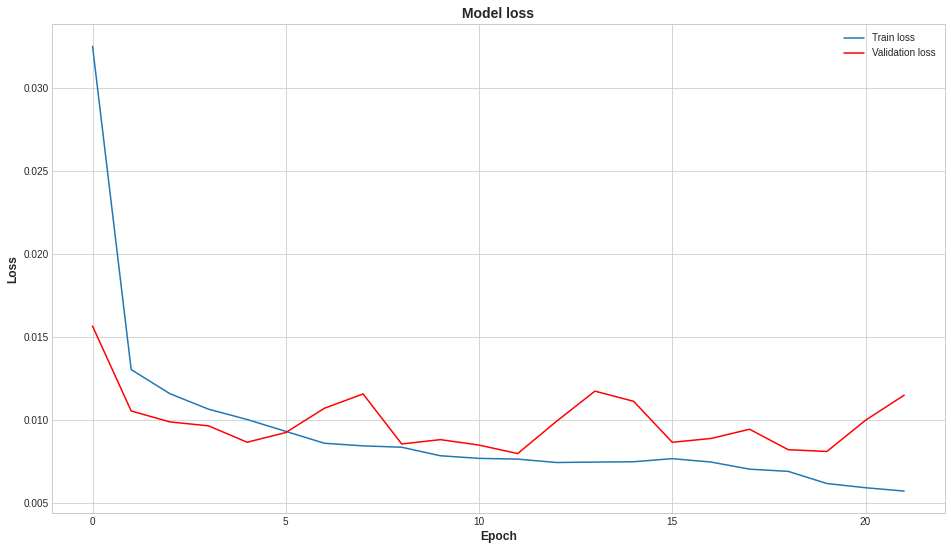

<Figure size 1152x648 with 0 Axes>

In [122]:
# Plot the loss and val_loss against the epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],color='red')
plt.title('Model loss',size=14,fontweight='bold')
plt.ylabel('Loss',size=12,fontweight='semibold')
plt.xlabel('Epoch',size=12,fontweight='semibold')
plt.legend(['Train loss', 'Validation loss'])
plt.figure(figsize=(16,9))
plt.show()

In [123]:
# Check the model summary
Trained_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 90, 100)           32400     
_________________________________________________________________
dropout_10 (Dropout)         (None, 90, 100)           0         
_________________________________________________________________
gru_2 (GRU)                  (None, 50)                22800     
_________________________________________________________________
dropout_11 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 51        
Total params: 55,251
Trainable params: 55,251
Non-trainable params: 0
_________________________________________________________________


In [124]:
# predictions for GRU

predictions = []
for i in x_test_multi:
    # predict the daily streamflow
    i_reshape = i.reshape(1, i.shape[0], i.shape[1])
    Predicted_results = Trained_model.predict(i_reshape)
    # store the predictions
    predictions.append(Predicted_results)
print(predictions[0])

[[0.5727445]]


In [125]:
# convert prediction list to numpy array
predictions = np.array(predictions).reshape(-1, 1)
print(predictions.shape)

(1046, 1)


In [126]:
# Rescale the predicted values back to the original scale.

predictions_Inv_trans = scaler.inverse_transform(predictions)
print(predictions_Inv_trans[0])
print(predictions_Inv_trans.shape)
print(len(predictions_Inv_trans))

[355.67432]
(1046, 1)
1046


In [127]:
# Define the time-series evaluation function

def timeseries_evaluation_metrics_func(y_true, y_pred):
    kgeprime, r, gamma, beta = he.kgeprime(y_pred, y_true)
    kge, r, alpha, beta = he.kge(y_pred, y_true)
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print('Evaluation metric results:-')
    print(f'NSE is : {he.nse(np.array(y_pred), np.array(y_true))}')
    print(f"KGE' is : {kgeprime}")
    print(f'r is : {r}, gamma is : {gamma}')
    print(f'KGE is : {kge}')
    print(f'alpha is : {alpha}, beta is : {beta}')
    print(f'PBIAS is : {he.pbias(np.array(y_pred), np.array(y_true))}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MARE is : {he.mare(np.array(y_pred), np.array(y_true))}')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}') 
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')
timeseries_evaluation_metrics_func(validate['H'].values.reshape(-1, 1),predictions_Inv_trans)

Evaluation metric results:-
NSE is : [0.88384124]
KGE' is : [0.91402486]
r is : [0.94763913], gamma is : [0.97415808]
KGE is : [0.88021669]
alpha is : [0.91268378], beta is : [0.93689486]
PBIAS is : [6.31051359]
RMSE is : 53.51666007639718
MARE is : [0.13463042]
MSE is : 2864.0329057326435
MAE is : 38.132070876900144
MAPE is : 20.427529790570663
R2 is : 0.8838412371266261



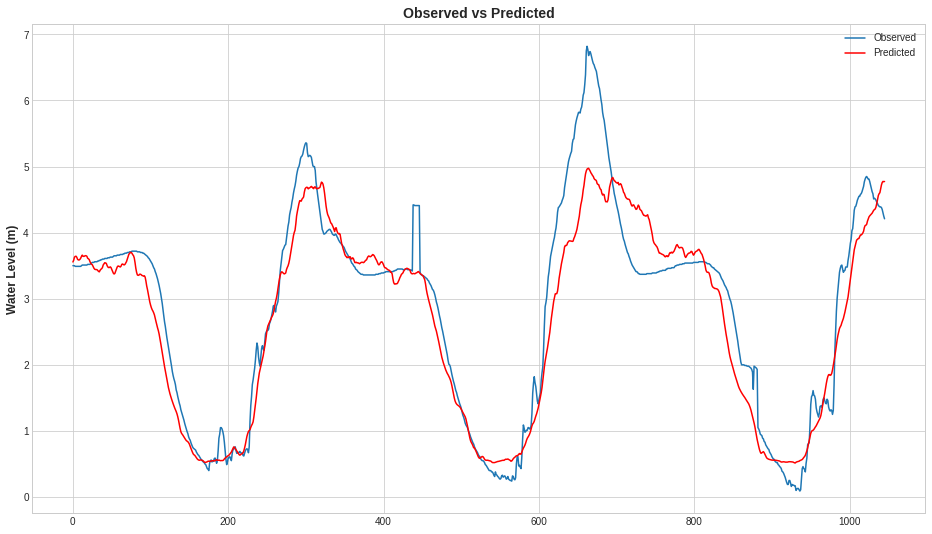

<Figure size 1152x648 with 0 Axes>

In [128]:
# Plot the Observed versus predicted values.
plt.plot( list(validate['H'] / 100))
plt.plot( list(predictions_Inv_trans / 100),color='red')
plt.title("Observed vs Predicted",size=14,fontweight='bold')
plt.ylabel("Water Level (m)",size=12,fontweight='semibold')
plt.legend(('Observed','Predicted'))
plt.figure(figsize=(16,9))
plt.show()

In [129]:
# save GPM IMERGE train loss and val loss to CSV
df_history = pd.DataFrame.from_records([history.history['loss'],history.history['val_loss']], index=['train_loss', 'val_loss']).transpose()
df_history.to_csv('/home/jefire/project/water/models/jiderebode_models/jide_h/jide_h_70_30_split/GRU_Multi_Jiderebode_H_1step_90days_gpm_relu_minmax_history.csv', index=False)

In [130]:
# 8th Model Bidirectional LSTM

# import all libraries and modules
import tensorflow as tf
import pandas as pd  # for data manipulation
import numpy as np    # for mathematical calculation
# import seaborn as sns   # for data visualisation
import matplotlib.pyplot as plt   # for plotting graph
%matplotlib inline 
# matplotlib inline ensures command in cells bellow the cell that outputs a plot does not affect the plot
from sklearn import metrics
from sklearn.preprocessing import QuantileTransformer, StandardScaler, MinMaxScaler
tf.random.set_seed(123)
np.random.seed(123)
import warnings   # to ignore warnings
import datetime
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn import set_config
import hydroeval as he

In [131]:
# Prepare the training and validation time-series data
BATCH_SIZE = 256
BUFFER_SIZE = 150
train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi, y_val_multi))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

In [132]:
# Define the Bidirectional LSTM model

Bi_lstm_model = tf.keras.models.Sequential([
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(150, activation='relu',
return_sequences=True), input_shape=x_train_multi.shape[-2:]),
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50, activation='relu')),
tf.keras.layers.Dense(20, activation='relu'),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(units=horizon),
])
Bi_lstm_model.compile(optimizer='adam', loss='mse')

In [133]:
# the best weights are stored in model path
model_path = r'/home/jefire/project/water/models/jiderebode_models/jide_h/jide_h_70_30_split/Bidirectional_LSTM_Multi_Jiderebode_H_1step_90days_gpm_relu_minmax.h5'

In [134]:
# Configure the model and start training with early stopping and checkpointing

EVALUATION_INTERVAL = 150
EPOCHS = 500
history = Bi_lstm_model.fit(train_data_multi, epochs=EPOCHS,
steps_per_epoch=EVALUATION_INTERVAL,validation_data=val_data_multi,
validation_steps=50,verbose =1,callbacks =[tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='min'),
    tf.keras.callbacks.ModelCheckpoint(model_path,monitor='val_loss', 
    save_best_only=True, mode='min', verbose=0)])

Epoch 1/500
150/150 [==============================] - 59s 367ms/step - loss: 0.0408 - val_loss: 0.0125
Epoch 2/500
150/150 [==============================] - 54s 362ms/step - loss: 0.0124 - val_loss: 0.0070
Epoch 3/500
150/150 [==============================] - 54s 362ms/step - loss: 0.0108 - val_loss: 0.0068
Epoch 4/500
150/150 [==============================] - 54s 363ms/step - loss: 0.0101 - val_loss: 0.0076
Epoch 5/500
150/150 [==============================] - 54s 361ms/step - loss: 0.0098 - val_loss: 0.0068
Epoch 6/500
150/150 [==============================] - 53s 355ms/step - loss: 0.0085 - val_loss: 0.0079
Epoch 7/500
150/150 [==============================] - 53s 352ms/step - loss: 0.0079 - val_loss: 0.0132
Epoch 8/500
150/150 [==============================] - 53s 353ms/step - loss: 0.0081 - val_loss: 0.0110
Epoch 9/500
150/150 [==============================] - 53s 354ms/step - loss: 0.0085 - val_loss: 0.0071
Epoch 10/500
150/150 [==============================] - 53s 353m

In [135]:
# Load the best weights into the model
Trained_model = tf.keras.models.load_model(model_path)

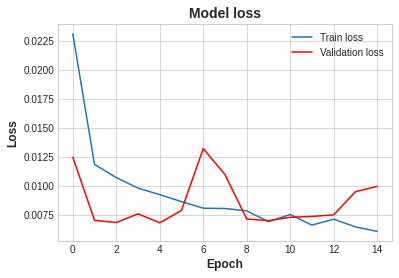

<Figure size 1152x648 with 0 Axes>

In [136]:
# Plot the loss and val_loss against the epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],color='red')
plt.title('Model loss',size=14,fontweight='bold')
plt.ylabel('Loss',size=12,fontweight='semibold')
plt.xlabel('Epoch',size=12,fontweight='semibold')
plt.legend(['Train loss', 'Validation loss'])
plt.figure(figsize=(16,9))
plt.show()

In [137]:
# Check the model summary
Trained_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 90, 300)           188400    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 100)               140400    
_________________________________________________________________
dense_9 (Dense)              (None, 20)                2020      
_________________________________________________________________
dropout_12 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 21        
Total params: 330,841
Trainable params: 330,841
Non-trainable params: 0
_________________________________________________________________


In [138]:
predictions = []
for i in x_test_multi:
    # predict the hour
    i_reshape = i.reshape(1, i.shape[0], i.shape[1])
    Predicted_results = Trained_model.predict(i_reshape)
    # store the predictions
    predictions.append(Predicted_results)
print(predictions[0])

[[0.5617852]]


In [139]:
# convert prediction list to numpy array
predictions = np.array(predictions).reshape(-1, 1)
print(predictions.shape)

(1046, 1)


In [140]:
# Rescale the predicted values back to the original scale.

predictions_Inv_trans = scaler.inverse_transform(predictions)
print(predictions_Inv_trans[0])
print(predictions_Inv_trans.shape)

[348.86862]
(1046, 1)


In [141]:
# correct evaluation metrics

# Define the time-series evaluation function

def timeseries_evaluation_metrics_func(y_true, y_pred):
    kgeprime, r, gamma, beta = he.kgeprime(y_pred, y_true)
    kge, r, alpha, beta = he.kge(y_pred, y_true)
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print('Evaluation metric results:-')
    print(f'NSE is : {he.nse(np.array(y_pred), np.array(y_true))}')
    print(f"KGE' is : {kgeprime}")
    print(f'r is : {r}, gamma is : {gamma}')
    print(f'KGE is : {kge}')
    print(f'alpha is : {alpha}, beta is : {beta}')
    print(f'PBIAS is : {he.pbias(np.array(y_pred), np.array(y_true))}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MARE is : {he.mare(np.array(y_pred), np.array(y_true))}')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}') 
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')
timeseries_evaluation_metrics_func(validate['H'].values.reshape(-1, 1),predictions_Inv_trans)

Evaluation metric results:-
NSE is : [0.87875938]
KGE' is : [0.9181229]
r is : [0.94076711], gamma is : [0.96292881]
KGE is : [0.89304657]
alpha is : [0.92183703], beta is : [0.95732621]
PBIAS is : [4.26737851]
RMSE is : 54.67478549612369
MARE is : [0.14271143]
MSE is : 2989.332169047137
MAE is : 40.420897051663516
MAPE is : 22.912458855042026
R2 is : 0.8787593795172306



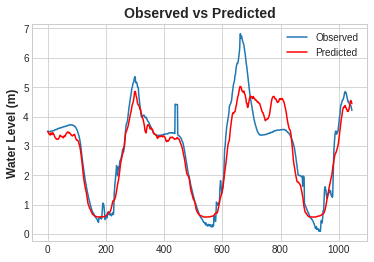

<Figure size 1152x648 with 0 Axes>

In [142]:
# Plot the Observed versus predicted values.
plt.plot( list(validate['H'] / 100))
plt.plot( list(predictions_Inv_trans / 100),color='red')
plt.title("Observed vs Predicted",size=14,fontweight='bold')
plt.ylabel("Water Level (m)",size=12,fontweight='semibold')
plt.legend(('Observed','Predicted'))
plt.figure(figsize=(16,9))
plt.show()

In [143]:
# save GPM IMERGE train loss and val loss to CSV
df_history = pd.DataFrame.from_records([history.history['loss'],history.history['val_loss']], index=['train_loss', 'val_loss']).transpose()
df_history.to_csv('/home/jefire/project/water/models/jiderebode_models/jide_h/jide_h_70_30_split/Bidirectional_LSTM_Multi_Jiderebode_H_1step_90days_gpm_relu_minmax_history.csv', index=False)